In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("d4rklucif3r/cat-and-dogs")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dogs' dataset.
Path to dataset files: /kaggle/input/cat-and-dogs


In [17]:
import os
os.listdir("/kaggle/input/cat-and-dogs/dataset")

['test_set', 'single_prediction', 'training_set']

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# ====== CONFIG ======
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DIR = "/kaggle/input/cat-and-dogs/dataset/training_set"
TEST_DIR = "/kaggle/input/cat-and-dogs/dataset/test_set"

# ====== DATA ======
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# ====== MODEL ======
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1],3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ====== TRAIN ======
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# ====== SAVE MODEL ======
model.save("cat_dog_classifier.h5")


Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.5266 - loss: 0.7159 - val_accuracy: 0.6637 - val_loss: 0.6122
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.6756 - loss: 0.5915 - val_accuracy: 0.6856 - val_loss: 0.5860
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7419 - loss: 0.5149 - val_accuracy: 0.7212 - val_loss: 0.5420
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.7937 - loss: 0.4444 - val_accuracy: 0.7312 - val_loss: 0.5587
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.8304 - loss: 0.3763 - val_accuracy: 0.7631 - val_loss: 0.5189
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.8895 - loss: 0.2658 - val_accuracy: 0.7375 - val_loss: 0.6138
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9336 - loss: 0.1748 - val_accuracy: 0.7506 - val_loss: 0.7524
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9558 - loss: 0.1169 - val_accu

In [11]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSGWiBaBAIPsEW0MWu7GLSY22XUR4NM8jGhg&s

/bin/bash: line 1: s: command not found
--2025-10-08 11:48:28--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSGWiBaBAIPsEW0MWu7GLSY22XUR4NM8jGhg
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.188.138, 142.251.188.100, 142.251.188.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.188.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3840 (3.8K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcSSGWiBaBAIPsEW0MWu7GLSY22XUR4NM8jGhg’

images?q=tbn:ANd9Gc 100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-10-08 11:48:28 (37.6 MB/s) - ‘images?q=tbn:ANd9GcSSGWiBaBAIPsEW0MWu7GLSY22XUR4NM8jGhg’ saved [3840/3840]



In [23]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = load_model("cat_dog_classifier.h5")

def predict_image(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    # Predict
    pred = model.predict(x)[0][0]
    label = "dog" if pred > 0.5 else "cat"
    prob = pred if pred > 0.5 else 1 - pred

    # Display image with label
    plt.imshow(img)
    plt.title(f"{label} ({prob:.2f})")
    plt.axis('off')
    plt.show()


In [14]:
!wget https://i.pinimg.com/736x/7c/0f/4a/7c0f4a5158cf72f0829b26bc52741b6f.jpg

--2025-10-08 11:53:14--  https://i.pinimg.com/736x/7c/0f/4a/7c0f4a5158cf72f0829b26bc52741b6f.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52481 (51K) [image/jpeg]
Saving to: ‘7c0f4a5158cf72f0829b26bc52741b6f.jpg’

7c0f4a5158cf72f0829 100%[===================>]  51.25K  --.-KB/s    in 0.008s  

2025-10-08 11:53:14 (6.42 MB/s) - ‘7c0f4a5158cf72f0829b26bc52741b6f.jpg’ saved [52481/52481]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


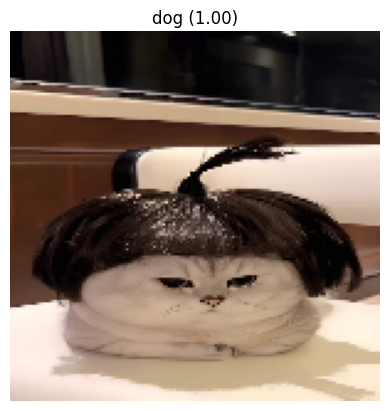

In [24]:
predict_image("/content/7c0f4a5158cf72f0829b26bc52741b6f.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


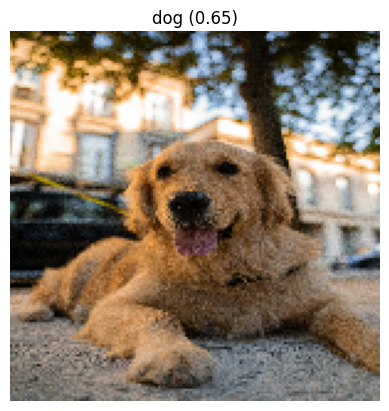

In [27]:
predict_image("/content/photo-1626736637845-53045bb9695b.jpeg")